In [5]:
# Load libraries
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import urllib
from pathlib import Path
import os
import urllib
#import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

pd.options.display.max_columns = 50

In [6]:
relative_path = '/raw/train.csv'
train_path = '/raw/train.csv'

cur_wd = os.getcwd()

file_path = cur_wd + relative_path


In [7]:
def load_set_data(target_month, outlier_cutoff, income_cutoff, path):
    relative_path = path
    cur_wd = os.getcwd()
    file_path = cur_wd + relative_path

    if not Path(file_path).exists():
        print('Filepath does not exist in the "raw" folder. Check again')

    else:
        print('Loading and cleaning data.')

    d_types = {'ID': str, 'Customer_ID': str, 'Month': str, 'Name': str, 'Age': int, 'SSN': str, 'Occupation': str, 'Annual_Income': str, 'Monthly_Inhand_Salary': float, 'Num_Bank_Accounts': int, 'Num_Credit_Card': int, 'Interest_Rate': int, 'Num_of_Loan': int,'Type_of_Loan': str,
'Delay_from_due_date': int, 'Num_of_Delayed_Payment': int, 'Changed_Credit_Limit': float, 'Num_Credit_Inquiries': float, 'Credit_Mix': str, 'Outstanding_Debt': str, 'Credit_Utilization_Ratio': float, 'Credit_History_Age': float, 'Payment_of_Min_Amount': str, 'Total_EMI_per_month': float,
       'Amount_invested_monthly': float, 'Payment_Behaviour': str, 'Monthly_Balance':float, 'Credit_Score':str}


    df = pd.read_csv(file_path)

    # Data cleaning, type conversion and filtering DataFrame
    # remove underscores and convert 'Annual Income' column from string to float
    df['Annual_Income'] = df['Annual_Income'].str.replace('_', '').astype(float)

    # filter out rows where 'Num_Credit_Inquiries' is blank and convert to integer
    df = df[df['Num_Credit_Inquiries'].notna()]
    df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(int)

    # filter out rows where 'Credit_Mix' has underscores
    df = df[~df['Credit_Mix'].str.contains('_')]

    # remove underscores and convert 'Outstanding_Debt' column from string to float
    df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '').astype(float)

    # no changes required for "Credit_Utilization_Ratio"

    # further filtering based on specific conditions
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '').astype(float)
    single_month_frame = df[df['Month'] ==  target_month]
    single_month_frame = single_month_frame[single_month_frame['Type_of_Loan'] !=  'Auto Loan']
    single_month_frame = single_month_frame[single_month_frame['Amount_invested_monthly'] < outlier_cutoff]
    single_month_frame = single_month_frame[single_month_frame['Annual_Income'] < income_cutoff]


    return single_month_frame

In [12]:
# checking data cleaning, type conversion and filtering DataFrame for April

# Load data for April with specified cutoffs
target_month = 'April'
outlier_cutoff = 10000
income_cutoff = 500000
path = train_path
import os
current_directory = os.getcwd()
print(current_directory)
print(path)

# Call the function to get the filtered DataFrame
april_data = load_set_data(target_month, outlier_cutoff, income_cutoff, path)

# Print the number of rows
print(f'Number of rows for {target_month}:', len(april_data))

/content
/raw/train.csv
Loading and cleaning data.


<ipython-input-7-5fe3beeb5db8>:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Number of rows for April: 8777


END OF CLEAN.

### Starting Deep Learning model

In [13]:
file_path_cs_class =  'raw/train.csv'
if not Path(file_path_cs_class).exists():
    print('Filepath does not exist in the "raw" folder. Check again')
else:
    print('Loading and cleaning data.')


pd_cs_class = pd.read_csv(file_path_cs_class)

Loading and cleaning data.


<ipython-input-13-a9998a15a169>:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_cs_class = pd.read_csv(file_path_cs_class)


In [25]:
# Data cleaning, type conversion and filtering DataFrame
features = ['Annual_Income','Num_Credit_Inquiries','Outstanding_Debt','Annual_Income',
            'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
            'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month' ]


# remove underscores and convert 'Annual Income' column from string to float

for f in features:
  pd_cs_class = pd_cs_class[pd_cs_class[f].notna()]

# Check the data type of 'Annual_Income'
print(pd_cs_class['Annual_Income'].dtype)

# If 'Annual_Income' is not already a string, convert it
if pd_cs_class['Annual_Income'].dtype != 'object':
    pd_cs_class['Annual_Income'] = pd_cs_class['Annual_Income'].astype(str)

# Now apply the string replacement and type conversion
pd_cs_class['Annual_Income'] = pd_cs_class['Annual_Income'].str.replace('_', '').astype(float)

pd_cs_class['Num_Credit_Inquiries'] = pd_cs_class['Num_Credit_Inquiries'].astype(int)
# filter out rows where 'Credit_Mix' has underscores
pd_cs_class = pd_cs_class[~pd_cs_class['Credit_Mix'].str.contains('_')]

# Check the data type of 'Outstanding_Debt' before applying string operations
print(pd_cs_class['Outstanding_Debt'].dtype)

# If it's already numeric, you don't need to remove underscores or convert it.
# If it's a mix of numeric and non-numeric, handle the non-numeric values appropriately before converting to float.
# For example, you could replace non-numeric values with NaN and then convert to float:
pd_cs_class['Outstanding_Debt'] = pd_cs_class['Outstanding_Debt'].replace('[^0-9.]', '', regex=True).astype(float)

pd_cs_class = pd_cs_class[pd_cs_class['Annual_Income'] < income_cutoff]

print(len(pd_cs_class))

float64
float64
65842


In [26]:
pd_cs_class.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,6.42,2,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,0,5.42,2,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good
15,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.90434353388733,Low_spent_Small_value_payments,356.07810855965045,Good
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,7.1,3,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
17,0x161b,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",13,6,7.1,3,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good


In [27]:

scaler = MinMaxScaler()
pd_cs_class[features] = scaler.fit_transform(pd_cs_class[features])

In [28]:
df_X = pd_cs_class[features]

In [29]:
df_y = pd_cs_class['Credit_Score']
cs_mapping = {
    'Good': 3,
    'Standard':2,
    'Poor':1
}
df_y = df_y.map(cs_mapping)

In [30]:

x_train, x_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.3,random_state=42)

In [31]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 3.4.1
TensorFlow version: 2.17.0


In [32]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


In [33]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(4, input_dim=hl, activation='softmax'))

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284 (1.11 KB)

 Trainable params: 284 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

None


In [35]:
#hyper-parameters for optimizer
learning_rate = 0.1
opt = optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 5
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/5
4609/4609 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.5554 - loss: 0.9250 - val_accuracy: 0.5072 - val_loss: 1.0544
Epoch 2/5
4609/4609 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.5599 - loss: 0.9154 - val_accuracy: 0.5291 - val_loss: 1.0360
Epoch 3/5
4609/4609 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5611 - loss: 0.9143 - val_accuracy: 0.4866 - val_loss: 1.0706
Epoch 4/5
4609/4609 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.5598 - loss: 0.9153 - val_accuracy: 0.5289 - val_loss: 1.0372
Epoch 5/5
4609/4609 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.5604 - loss: 0.9155 - val_accuracy: 0.5181 - val_loss: 1.0409


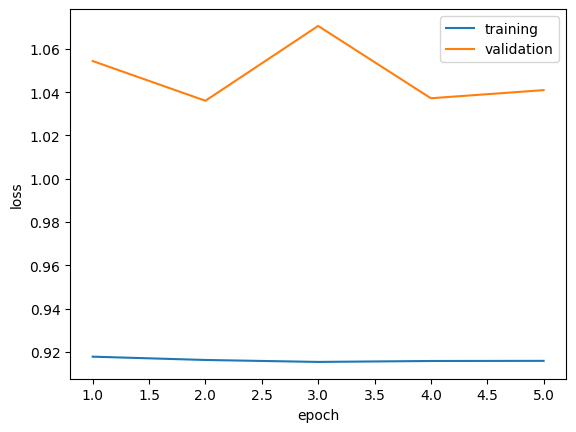

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [37]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[-5.599341   -0.16980052 -0.8754522  -0.73827434 -0.60941976 -0.25137183
   0.7447344  -0.3133401  -0.13024926  0.5106743 ]
 [ 0.9141595  -0.5042675  -0.17946157 -0.68307096 -0.971912   -0.06997287
  -1.2367889  -0.4581692  -0.6534135   0.07977933]
 [ 3.3243876  -1.034157   -0.58605474 -0.3435617  -0.99745363 -1.6112485
  -1.6798855  -1.0764036   0.31649292 -0.23624235]
 [-6.3593097  -0.7318922  -0.55711013 -0.22553688 -1.0266044  -0.11685873
  -0.11773312 -0.46164834 -0.38514844 -0.46354812]
 [ 2.7979946  -0.42235443 -0.8571251  -0.43219772 -0.902082    0.15514487
   0.28348076 -1.0304259  -0.30454034 -0.04258057]
 [ 0.8753587  -0.38184804 -0.6048757  -0.40189025 -0.57481617 -0.01519771
  -1.3016738  -0.24057628 -0.45529446 -0.13467827]
 [ 1.8253514  -0.7756276  -0.645362   -0.94129527 -0.5375305   0.72759813
  -1.5903587  -0.1266192   0.04681632 -0.23191664]
 [ 0.3270458  -0.15587118 -0.28662077 -1.0346725  -0.11454467  0.75091434
  -1.6560385  -0.9753034  -0.

618/618 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


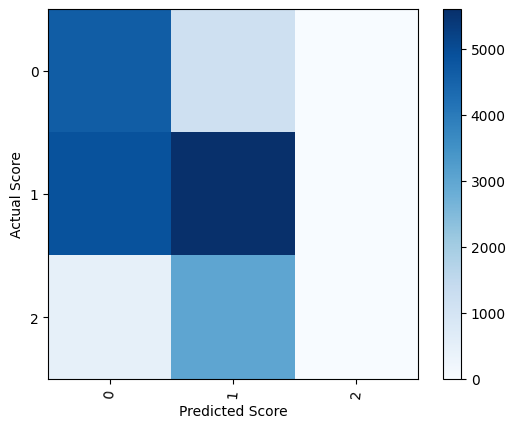

In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks,  rotation=85)
plt.yticks(tick_marks, )
plt.xlabel("Predicted Score")
plt.ylabel("Actual Score")
plt.show()